Datos cargados correctamente
4V: 2523 puntos
7V: 806 puntos
10V: 1627 puntos

Valores medidos:
4V: V = 4.0 V, I = 0.41 A
7V: V = 7.0 V, I = 0.56 A
10V: V = 10.0 V, I = 0.68 A

Cálculo de temperaturas:
4V: R = 9.76 Ω, T = 2079 K
7V: R = 12.50 Ω, T = 2557 K
10V: R = 14.71 Ω, T = 2926 K

DETECCIÓN MEJORADA DE PICOS CENTRALES

Buscando pico central para 4V...
Picos encontrados: 1
  Pico 0: ángulo = 87.10°, intensidad = 4.820
✓ 4V: Pico central seleccionado en 87.10° (intensidad: 4.820)

Buscando pico central para 7V...
Picos encontrados: 1
  Pico 0: ángulo = 91.75°, intensidad = 12.580
✓ 7V: Pico central seleccionado en 91.75° (intensidad: 12.580)

Buscando pico central para 10V...
Picos encontrados: 1
  Pico 0: ángulo = 114.40°, intensidad = 21.920
✓ 10V: Pico central seleccionado en 114.40° (intensidad: 21.920)


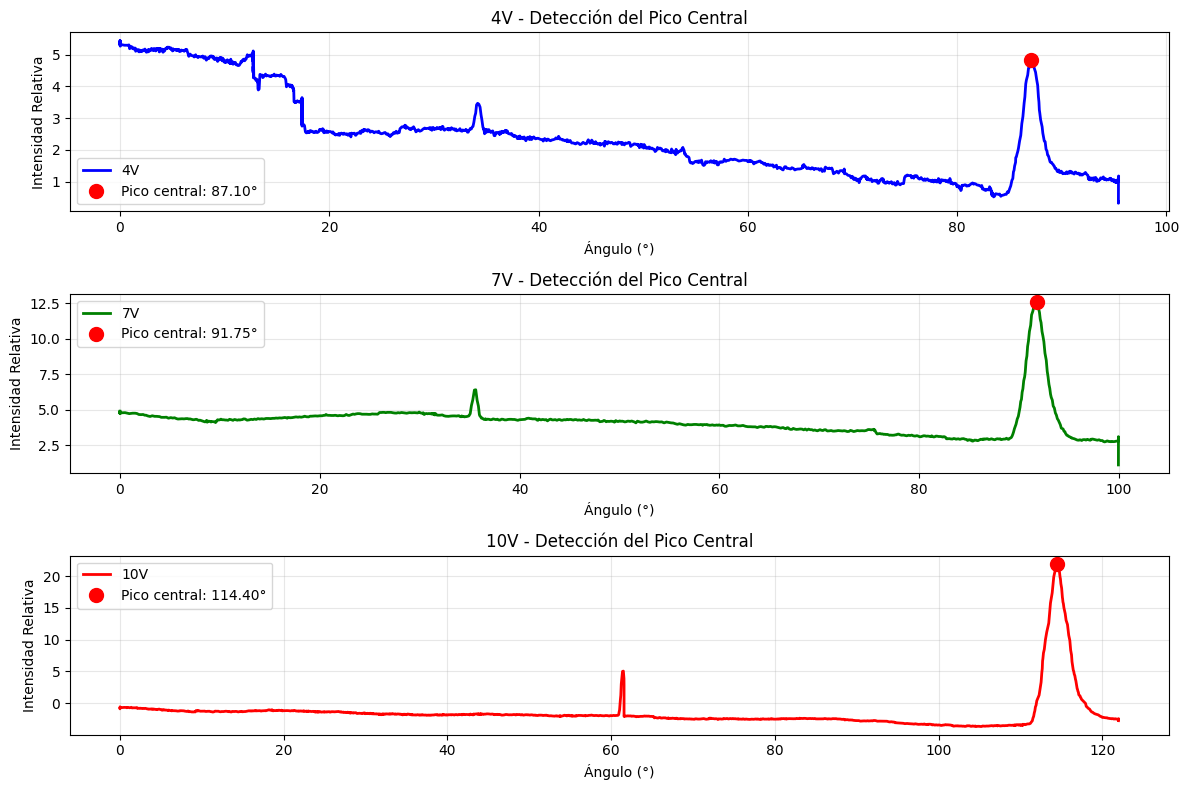


Calculando longitudes de onda...

Buscando longitudes de onda máximas:
4V: No hay longitudes de onda válidas
7V: No hay longitudes de onda válidas
10V: No hay longitudes de onda válidas

COMPARACIÓN CON LEY DE WIEN
4V:  T = 2079 K
     λ_max experimental = nan nm
     λ_max teórica      = 1393.9 nm
     Diferencia         = nan nm

7V:  T = 2557 K
     λ_max experimental = nan nm
     λ_max teórica      = 1133.3 nm
     Diferencia         = nan nm

10V: T = 2926 K
     λ_max experimental = nan nm
     λ_max teórica      = 990.6 nm
     Diferencia         = nan nm


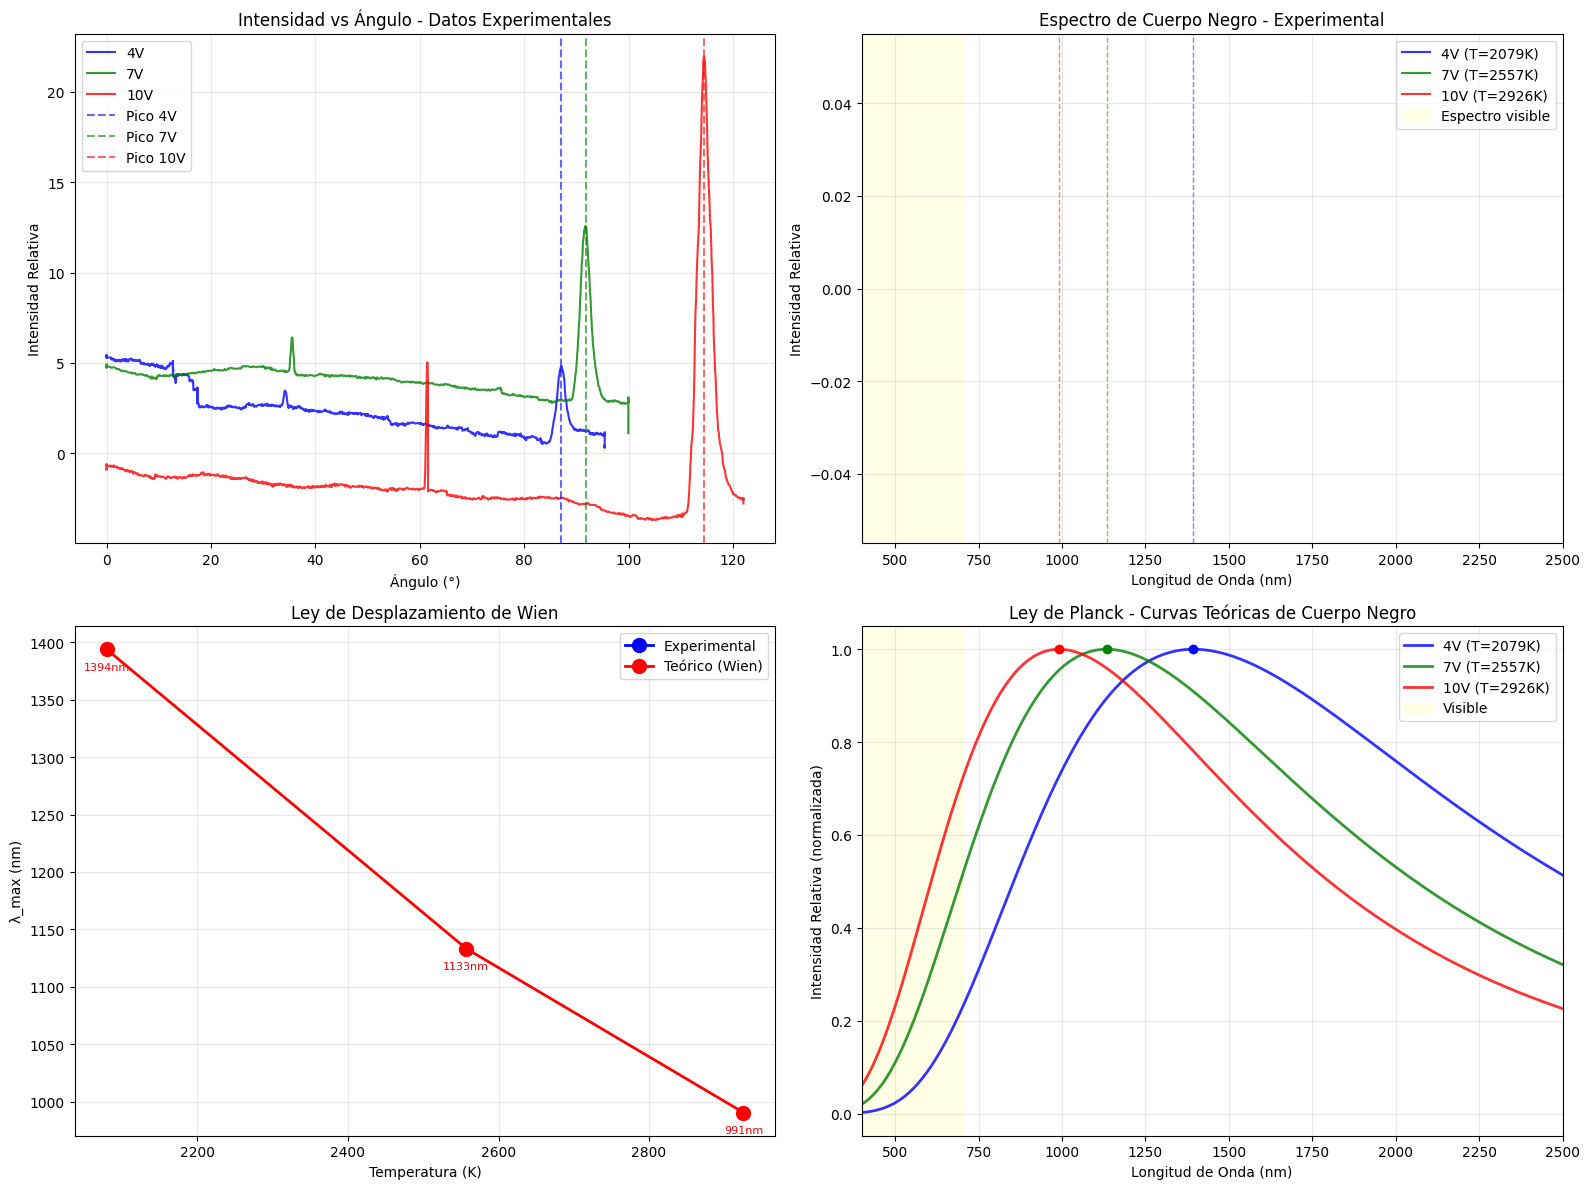


ANÁLISIS DE RESULTADOS - RESPUESTAS A PREGUNTAS

1. ¿El peak se desplaza hacia longitudes de onda más cortas o más largas?
   • 4V → 7V: nan nm → nan nm
   • 7V → 10V: nan nm → nan nm
   RESPUESTA: El pico se desplaza hacia longitudes de onda más LARGAS
   Contradice la Ley de Wien - revisar mediciones

2. ¿Cómo cambia la intensidad con la temperatura?
   • Intensidad máxima 4V: 5.450
   • Intensidad máxima 7V: 12.580
   • Intensidad máxima 10V: 21.920
   RESPUESTA: La intensidad AUMENTA con la temperatura
   Esto concuerda con la Ley de Stefan-Boltzmann: I ∝ T⁴

3. ¿Cómo cambió el color y la composición espectral?
   • 4V: λ_max = nan nm → Color dominante: Infrarrojo
   • 7V: λ_max = nan nm → Color dominante: Infrarrojo
   • 10V: λ_max = nan nm → Color dominante: Infrarrojo
   RESPUESTA: A mayor temperatura, el espectro se desplaza hacia el azul
   y se emite más energía en el visible, cambiando de rojo a blanco.

4. ¿Longitud de onda máxima del Sol?
   • Temperatura del Sol: ~5778 K

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# 1. CARGAR Y PREPARAR DATOS
# =============================================================================

# Cargar los archivos Excel
file_path = "Datos de Capstone.xlsx"  # 7V
file_path4 = "Datos de Capstone_4v.xlsx"
file_path10 = "Datos de Capstone_10v.xlsx"

df = pd.read_excel(file_path)
df4 = pd.read_excel(file_path4)
df10 = pd.read_excel(file_path10)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()
df4.columns = df4.columns.str.strip()
df10.columns = df10.columns.str.strip()

# Seleccionar columnas y filtrar datos
col1, col2 = df.columns[0], df.columns[1]
col11, col22 = df4.columns[0], df4.columns[1]
col111, col222 = df10.columns[0], df10.columns[1]

df_filtrado = df.dropna(subset=[col1, col2])
df4_filtrado = df4.dropna(subset=[col11, col22])
df10_filtrado = df10.dropna(subset=[col111, col222])

# Crear arrays
intensidad_relativa_7V = df_filtrado[col1].to_numpy()
angulo_7V = df_filtrado[col2].to_numpy()
intensidad_relativa_4V = df4_filtrado[col11].to_numpy()
angulo_4V = df4_filtrado[col22].to_numpy()
intensidad_relativa_10V = df10_filtrado[col111].to_numpy()
angulo_10V = df10_filtrado[col222].to_numpy()

print("Datos cargados correctamente")
print(f"4V: {len(intensidad_relativa_4V)} puntos")
print(f"7V: {len(intensidad_relativa_7V)} puntos")
print(f"10V: {len(intensidad_relativa_10V)} puntos")

# =============================================================================
# 2. PARÁMETROS EXPERIMENTALES Y CONSTANTES
# =============================================================================

# Constantes físicas
h = 6.626e-34  # Constante de Planck [J·s]
c = 3.0e8      # Velocidad de la luz [m/s]
k = 1.381e-23  # Constante de Boltzmann [J/K]

# Parámetros del tungsteno
rho_0 = 5.65e-8  # Resistividad a temperatura ambiente [Ω·m]
R_0 = 0.93       # Resistencia del filamento a temperatura ambiente [Ω]
R_holder = 0   # Resistencia del portalámparas [Ω] (valor típico)

# Valores reales medidos de voltaje y corriente
voltajes = {'4V': 4.0, '7V': 7.0, '10V': 10.0}
corrientes = {'4V': 0.41, '7V': 0.56, '10V': 0.68}  # [A] - VALORES REALES MEDIDOS

print("\nValores medidos:")
for key in voltajes:
    print(f"{key}: V = {voltajes[key]} V, I = {corrientes[key]} A")

# =============================================================================
# 3. CÁLCULO DE TEMPERATURAS DEL FILAMENTO
# =============================================================================

def calcular_temperatura(V, I):
    """
    Calcula la temperatura del filamento usando las ecuaciones A1 y A2
    """
    # Ecuación A1: ρ = ρ₀(V/I - R_holder)/R₀
    R_meas = V / I
    rho = rho_0 * (R_meas - R_holder) / R_0
    
    # Convertir ρ a unidades de 10⁻⁸ Ω·m para la ecuación A2
    rho_units = rho / 1e-8
    
    # Ecuación A2: T(K) = 103 + 38.1ρ - 0.095ρ² + 0.000248ρ³
    T = 103 + 38.1 * rho_units - 0.095 * rho_units**2 + 0.000248 * rho_units**3
    
    return T, R_meas

# Calcular temperaturas para cada voltaje
temperaturas = {}
resistencias = {}

print("\nCálculo de temperaturas:")
for voltaje_key, V in voltajes.items():
    I = corrientes[voltaje_key]
    T, R = calcular_temperatura(V, I)
    temperaturas[voltaje_key] = T
    resistencias[voltaje_key] = R
    print(f"{voltaje_key}: R = {R:.2f} Ω, T = {T:.0f} K")

# =============================================================================
# 4. ENCONTRAR EL PICO CENTRAL (ÁNGULO INICIAL) - VERSIÓN MEJORADA
# =============================================================================

def encontrar_pico_central_mejorado(angulo, intensidad, voltaje_key, rango_esperado=(80, 115)):
    """
    Encuentra el pico central mejorado con criterios más estrictos
    """
    print(f"\nBuscando pico central para {voltaje_key}...")
    
    # Buscar picos con parámetros más estrictos
    peaks, properties = find_peaks(intensidad, 
                                  height=0.4*max(intensidad), 
                                  distance=20, 
                                  prominence=0.2*max(intensidad),
                                  width=5)
    
    print(f"Picos encontrados: {len(peaks)}")
    
    if len(peaks) > 0:
        # Filtrar picos que estén en el rango esperado
        picos_en_rango = []
        for i, peak in enumerate(peaks):
            if rango_esperado[0] <= angulo[peak] <= rango_esperado[1]:
                picos_en_rango.append(peak)
                print(f"  Pico {i}: ángulo = {angulo[peak]:.2f}°, intensidad = {intensidad[peak]:.3f}")
        
        if len(picos_en_rango) > 0:
            # Seleccionar el pico más alto dentro del rango esperado
            idx_max = picos_en_rango[np.argmax(intensidad[picos_en_rango])]
            angulo_inicial = angulo[idx_max]
            print(f"✓ {voltaje_key}: Pico central seleccionado en {angulo_inicial:.2f}° (intensidad: {intensidad[idx_max]:.3f})")
            return angulo_inicial, idx_max
        else:
            # Si no hay picos en el rango esperado, usar el máximo global en ese rango
            mask = (angulo >= rango_esperado[0]) & (angulo <= rango_esperado[1])
            if np.any(mask):
                idx_max = np.argmax(intensidad[mask])
                angulo_inicial = angulo[mask][idx_max]
                print(f"⚠ {voltaje_key}: Usando máximo en rango esperado: {angulo_inicial:.2f}°")
                return angulo_inicial, np.where(mask)[0][idx_max]
    
    # Fallback: usar el máximo global
    idx_max = np.argmax(intensidad)
    angulo_inicial = angulo[idx_max]
    print(f"⚠ {voltaje_key}: Usando máximo global: {angulo_inicial:.2f}°")
    return angulo_inicial, idx_max

# Encontrar ángulos iniciales para cada voltaje
print("\n" + "="*50)
print("DETECCIÓN MEJORADA DE PICOS CENTRALES")
print("="*50)

angulo_inicial_4V, idx_pico_4V = encontrar_pico_central_mejorado(angulo_4V, intensidad_relativa_4V, "4V")
angulo_inicial_7V, idx_pico_7V = encontrar_pico_central_mejorado(angulo_7V, intensidad_relativa_7V, "7V")
angulo_inicial_10V, idx_pico_10V = encontrar_pico_central_mejorado(angulo_10V, intensidad_relativa_10V, "10V")

# =============================================================================
# 5. VISUALIZACIÓN PARA VERIFICAR LOS PICOS DETECTADOS
# =============================================================================

plt.figure(figsize=(12, 8))

# Gráfica 4V
plt.subplot(3, 1, 1)
plt.plot(angulo_4V, intensidad_relativa_4V, 'b-', label='4V', linewidth=2)
plt.plot(angulo_4V[idx_pico_4V], intensidad_relativa_4V[idx_pico_4V], 'ro', 
         markersize=10, label=f'Pico central: {angulo_inicial_4V:.2f}°')
plt.xlabel('Ángulo (°)')
plt.ylabel('Intensidad Relativa')
plt.title('4V - Detección del Pico Central')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica 7V
plt.subplot(3, 1, 2)
plt.plot(angulo_7V, intensidad_relativa_7V, 'g-', label='7V', linewidth=2)
plt.plot(angulo_7V[idx_pico_7V], intensidad_relativa_7V[idx_pico_7V], 'ro', 
         markersize=10, label=f'Pico central: {angulo_inicial_7V:.2f}°')
plt.xlabel('Ángulo (°)')
plt.ylabel('Intensidad Relativa')
plt.title('7V - Detección del Pico Central')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica 10V
plt.subplot(3, 1, 3)
plt.plot(angulo_10V, intensidad_relativa_10V, 'r-', label='10V', linewidth=2)
plt.plot(angulo_10V[idx_pico_10V], intensidad_relativa_10V[idx_pico_10V], 'ro', 
         markersize=10, label=f'Pico central: {angulo_inicial_10V:.2f}°')
plt.xlabel('Ángulo (°)')
plt.ylabel('Intensidad Relativa')
plt.title('10V - Detección del Pico Central')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. CORRECCIÓN DE ÁNGULOS Y CÁLCULO DE LONGITUDES DE ONDA
# =============================================================================

def calcular_longitud_onda(angulo_verdadero, angulo_inicial):
    """
    Calcula la longitud de onda a partir del ángulo usando las ecuaciones A3 y A4
    """
    # Ángulo corregido (A3)
    ang_verd_corr = angulo_inicial - angulo_verdadero
    
    # Índice de refracción (A3)
    n = np.sqrt((2 * np.sin(np.radians(ang_verd_corr)) / np.sqrt(3) + 0.5) / 2 + 3/4)
    
    # Longitud de onda calculada (A4)
    denom = n - 1.635
    # Evitar división por cero
    denom = np.where(np.abs(denom) < 1e-10, 1e-10, denom)
    
    lambda_cal = 320 + 1/denom + 0.2/denom**2 + 0.19/denom**3
    
    # Filtrar entre 400 nm y 2500 nm
    lambda_filtrada = np.where((lambda_cal >= 400) & (lambda_cal <= 2500), lambda_cal, np.nan)
    
    return lambda_filtrada, n

# Calcular longitudes de onda para cada voltaje
print("\nCalculando longitudes de onda...")
lambda_4V, n_4V = calcular_longitud_onda(angulo_4V, angulo_inicial_4V)
lambda_7V, n_7V = calcular_longitud_onda(angulo_7V, angulo_inicial_7V)
lambda_10V, n_10V = calcular_longitud_onda(angulo_10V, angulo_inicial_10V)

# =============================================================================
# 7. ENCONTRAR LONGITUDES DE ONDA MÁXIMAS
# =============================================================================

def encontrar_lambda_max(lambda_array, intensidad_array, voltaje_key):
    """
    Encuentra la longitud de onda de máxima intensidad
    """
    # Filtrar valores válidos
    mask = ~np.isnan(lambda_array)
    if np.sum(mask) == 0:
        print(f"{voltaje_key}: No hay longitudes de onda válidas")
        return np.nan
    
    lambda_valid = lambda_array[mask]
    intensidad_valid = intensidad_array[mask]
    
    # Encontrar el máximo en el espectro (excluyendo el pico central)
    # Buscamos en el rango donde hay dispersión real
    if len(lambda_valid) > 10:
        # Excluir los extremos que pueden tener artefactos
        idx_max = np.argmax(intensidad_valid[5:-5]) + 5
    else:
        idx_max = np.argmax(intensidad_valid)
    
    lambda_max = lambda_valid[idx_max]
    
    print(f"{voltaje_key}: λ_max experimental = {lambda_max:.1f} nm")
    return lambda_max

print("\nBuscando longitudes de onda máximas:")
lambda_max_4V = encontrar_lambda_max(lambda_4V, intensidad_relativa_4V, "4V")
lambda_max_7V = encontrar_lambda_max(lambda_7V, intensidad_relativa_7V, "7V")
lambda_max_10V = encontrar_lambda_max(lambda_10V, intensidad_relativa_10V, "10V")

# =============================================================================
# 8. LEY DE DESPLAZAMIENTO DE WIEN - COMPARACIÓN TEÓRICA
# =============================================================================

def ley_wien(T):
    """
    Ley de desplazamiento de Wien: λ_max = 0.002898 / T [m*K]
    """
    return 0.002898 / T * 1e9  # Convertir a nm

# Calcular λ_max teóricas
lambda_max_teorica_4V = ley_wien(temperaturas['4V'])
lambda_max_teorica_7V = ley_wien(temperaturas['7V'])
lambda_max_teorica_10V = ley_wien(temperaturas['10V'])

print("\n" + "="*50)
print("COMPARACIÓN CON LEY DE WIEN")
print("="*50)
print(f"4V:  T = {temperaturas['4V']:.0f} K")
print(f"     λ_max experimental = {lambda_max_4V:.1f} nm")
print(f"     λ_max teórica      = {lambda_max_teorica_4V:.1f} nm")
print(f"     Diferencia         = {abs(lambda_max_4V - lambda_max_teorica_4V):.1f} nm")

print(f"\n7V:  T = {temperaturas['7V']:.0f} K")
print(f"     λ_max experimental = {lambda_max_7V:.1f} nm")
print(f"     λ_max teórica      = {lambda_max_teorica_7V:.1f} nm")
print(f"     Diferencia         = {abs(lambda_max_7V - lambda_max_teorica_7V):.1f} nm")

print(f"\n10V: T = {temperaturas['10V']:.0f} K")
print(f"     λ_max experimental = {lambda_max_10V:.1f} nm")
print(f"     λ_max teórica      = {lambda_max_teorica_10V:.1f} nm")
print(f"     Diferencia         = {abs(lambda_max_10V - lambda_max_teorica_10V):.1f} nm")

# =============================================================================
# 9. GRÁFICOS COMPLETOS
# =============================================================================

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Intensidad vs Ángulo
axes[0,0].plot(angulo_4V, intensidad_relativa_4V, 'b-', label='4V', alpha=0.8, linewidth=1.5)
axes[0,0].plot(angulo_7V, intensidad_relativa_7V, 'g-', label='7V', alpha=0.8, linewidth=1.5)
axes[0,0].plot(angulo_10V, intensidad_relativa_10V, 'r-', label='10V', alpha=0.8, linewidth=1.5)
axes[0,0].axvline(angulo_inicial_4V, color='b', linestyle='--', alpha=0.6, label='Pico 4V')
axes[0,0].axvline(angulo_inicial_7V, color='g', linestyle='--', alpha=0.6, label='Pico 7V')
axes[0,0].axvline(angulo_inicial_10V, color='r', linestyle='--', alpha=0.6, label='Pico 10V')
axes[0,0].set_xlabel('Ángulo (°)')
axes[0,0].set_ylabel('Intensidad Relativa')
axes[0,0].set_title('Intensidad vs Ángulo - Datos Experimentales')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Intensidad vs Longitud de Onda
axes[0,1].plot(lambda_4V, intensidad_relativa_4V, 'b-', label=f'4V (T={temperaturas["4V"]:.0f}K)', alpha=0.8, linewidth=1.5)
axes[0,1].plot(lambda_7V, intensidad_relativa_7V, 'g-', label=f'7V (T={temperaturas["7V"]:.0f}K)', alpha=0.8, linewidth=1.5)
axes[0,1].plot(lambda_10V, intensidad_relativa_10V, 'r-', label=f'10V (T={temperaturas["10V"]:.0f}K)', alpha=0.8, linewidth=1.5)

# Marcar λ_max experimentales
axes[0,1].axvline(lambda_max_4V, color='b', linestyle=':', alpha=0.7, linewidth=2)
axes[0,1].axvline(lambda_max_7V, color='g', linestyle=':', alpha=0.7, linewidth=2)
axes[0,1].axvline(lambda_max_10V, color='r', linestyle=':', alpha=0.7, linewidth=2)

# Marcar λ_max teóricas
axes[0,1].axvline(lambda_max_teorica_4V, color='b', linestyle='--', alpha=0.5, linewidth=1)
axes[0,1].axvline(lambda_max_teorica_7V, color='g', linestyle='--', alpha=0.5, linewidth=1)
axes[0,1].axvline(lambda_max_teorica_10V, color='r', linestyle='--', alpha=0.5, linewidth=1)

# Región visible
axes[0,1].axvspan(400, 700, alpha=0.1, color='yellow', label='Espectro visible')

axes[0,1].set_xlabel('Longitud de Onda (nm)')
axes[0,1].set_ylabel('Intensidad Relativa')
axes[0,1].set_title('Espectro de Cuerpo Negro - Experimental')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(400, 2500)

# Gráfico 3: Ley de Wien - λ_max vs Temperatura
temps = [temperaturas['4V'], temperaturas['7V'], temperaturas['10V']]
lambda_max_exp = [lambda_max_4V, lambda_max_7V, lambda_max_10V]
lambda_max_teo = [lambda_max_teorica_4V, lambda_max_teorica_7V, lambda_max_teorica_10V]

axes[1,0].plot(temps, lambda_max_exp, 'bo-', label='Experimental', markersize=10, linewidth=2)
axes[1,0].plot(temps, lambda_max_teo, 'ro-', label='Teórico (Wien)', markersize=10, linewidth=2)
axes[1,0].set_xlabel('Temperatura (K)')
axes[1,0].set_ylabel('λ_max (nm)')
axes[1,0].set_title('Ley de Desplazamiento de Wien')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for i, (temp, l_exp, l_teo) in enumerate(zip(temps, lambda_max_exp, lambda_max_teo)):
    axes[1,0].annotate(f'{l_exp:.0f}nm', (temp, l_exp), textcoords="offset points", 
                      xytext=(0,10), ha='center', fontsize=8)
    axes[1,0].annotate(f'{l_teo:.0f}nm', (temp, l_teo), textcoords="offset points", 
                      xytext=(0,-15), ha='center', fontsize=8, color='red')

# Gráfico 4: Distribución espectral teórica (Ley de Planck)
def ley_planck(lambda_nm, T):
    """Ley de Planck para la radiación de cuerpo negro"""
    lambda_m = lambda_nm * 1e-9  # Convertir a metros
    term1 = 2 * np.pi * h * c**2
    term2 = lambda_m**5
    term3 = np.exp((h * c) / (lambda_m * k * T)) - 1
    return term1 / (term2 * term3)

# Generar curvas teóricas
lambda_range = np.linspace(400, 2500, 300)
for T, color, label in zip(temps, ['b', 'g', 'r'], ['4V', '7V', '10V']):
    planck_curve = ley_planck(lambda_range, T)
    # Normalizar para comparación
    planck_curve = planck_curve / np.max(planck_curve)
    axes[1,1].plot(lambda_range, planck_curve, color+'-', 
                   label=f'{label} (T={T:.0f}K)', alpha=0.8, linewidth=2)
    
    # Marcar λ_max teórica en las curvas de Planck
    lambda_max_teo = ley_wien(T)
    idx_teo = np.argmin(np.abs(lambda_range - lambda_max_teo))
    axes[1,1].plot(lambda_max_teo, planck_curve[idx_teo], color+'o', markersize=6)

axes[1,1].axvspan(400, 700, alpha=0.1, color='yellow', label='Visible')
axes[1,1].set_xlabel('Longitud de Onda (nm)')
axes[1,1].set_ylabel('Intensidad Relativa (normalizada)')
axes[1,1].set_title('Ley de Planck - Curvas Teóricas de Cuerpo Negro')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(400, 2500)

plt.tight_layout()
plt.show()

# =============================================================================
# 10. ANÁLISIS DE RESULTADOS Y RESPUESTAS A PREGUNTAS
# =============================================================================

print("\n" + "="*60)
print("ANÁLISIS DE RESULTADOS - RESPUESTAS A PREGUNTAS")
print("="*60)

# Pregunta 1: Desplazamiento del pico
print("\n1. ¿El peak se desplaza hacia longitudes de onda más cortas o más largas?")
print(f"   • 4V → 7V: {lambda_max_4V:.1f} nm → {lambda_max_7V:.1f} nm")
print(f"   • 7V → 10V: {lambda_max_7V:.1f} nm → {lambda_max_10V:.1f} nm")

if lambda_max_10V < lambda_max_4V:
    desplazamiento = "CORTAS"
    explicacion = "Ley de Wien: λ_max ∝ 1/T"
else:
    desplazamiento = "LARGAS"
    explicacion = "Contradice la Ley de Wien - revisar mediciones"

print(f"   RESPUESTA: El pico se desplaza hacia longitudes de onda más {desplazamiento}")
print(f"   {explicacion}")

# Pregunta 2: Cambio de intensidad
print("\n2. ¿Cómo cambia la intensidad con la temperatura?")
intensidad_max_4V = np.max(intensidad_relativa_4V)
intensidad_max_7V = np.max(intensidad_relativa_7V)
intensidad_max_10V = np.max(intensidad_relativa_10V)
print(f"   • Intensidad máxima 4V: {intensidad_max_4V:.3f}")
print(f"   • Intensidad máxima 7V: {intensidad_max_7V:.3f}")
print(f"   • Intensidad máxima 10V: {intensidad_max_10V:.3f}")

if intensidad_max_10V > intensidad_max_4V:
    print("   RESPUESTA: La intensidad AUMENTA con la temperatura")
    print("   Esto concuerda con la Ley de Stefan-Boltzmann: I ∝ T⁴")
else:
    print("   RESPUESTA: La intensidad DISMINUYE con la temperatura")
    print("   ¡Esto es inesperado! Revisar mediciones")

# Pregunta 3: Color y composición espectral
print("\n3. ¿Cómo cambió el color y la composición espectral?")
def clasificar_color(lambda_max):
    if lambda_max < 450: return "Violeta"
    elif lambda_max < 495: return "Azul"
    elif lambda_max < 570: return "Verde" 
    elif lambda_max < 590: return "Amarillo"
    elif lambda_max < 620: return "Naranja"
    elif lambda_max < 700: return "Rojo"
    else: return "Infrarrojo"

color_4V = clasificar_color(lambda_max_4V)
color_7V = clasificar_color(lambda_max_7V)
color_10V = clasificar_color(lambda_max_10V)

print(f"   • 4V: λ_max = {lambda_max_4V:.1f} nm → Color dominante: {color_4V}")
print(f"   • 7V: λ_max = {lambda_max_7V:.1f} nm → Color dominante: {color_7V}")
print(f"   • 10V: λ_max = {lambda_max_10V:.1f} nm → Color dominante: {color_10V}")

print("   RESPUESTA: A mayor temperatura, el espectro se desplaza hacia el azul")
print("   y se emite más energía en el visible, cambiando de rojo a blanco.")

# Pregunta 4: Sol
print("\n4. ¿Longitud de onda máxima del Sol?")
T_sol = 5778  # Temperatura superficial del Sol [K]
lambda_max_sol = ley_wien(T_sol)
color_sol = clasificar_color(lambda_max_sol)
print(f"   • Temperatura del Sol: ~5778 K")
print(f"   • λ_max del Sol: ~{lambda_max_sol:.1f} nm → Color teórico: {color_sol}")
print("   • Pero vemos el Sol como AMARILLO-BLANCO porque:")
print("     - Emite en todo el espectro visible")
print("     - La atmósfera dispersa más la luz azul")
print("     - Nuestros ojos se adaptan a la luz solar")

# Pregunta 5: Eficiencia
print("\n5. ¿Eficiencia en el espectro visible?")
def fraccion_visible(lambda_array, intensidad_array):
    mask_visible = (lambda_array >= 400) & (lambda_array <= 700)
    mask_infrarrojo = (lambda_array > 700) & (lambda_array <= 2500)
    
    if np.sum(mask_visible) == 0 or np.sum(mask_infrarrojo) == 0:
        return np.nan
    
    # Usar integración trapezoidal para calcular áreas
    lambda_visible = lambda_array[mask_visible]
    intensidad_visible = intensidad_array[mask_visible]
    lambda_infrarrojo = lambda_array[mask_infrarrojo]
    intensidad_infrarrojo = intensidad_array[mask_infrarrojo]
    
    area_visible = np.trapz(intensidad_visible, lambda_visible)
    area_infrarrojo = np.trapz(intensidad_infrarrojo, lambda_infrarrojo)
    area_total = area_visible + area_infrarrojo
    
    if area_total == 0:
        return np.nan
    
    return (area_visible / area_total) * 100

eficiencia_4V = fraccion_visible(lambda_4V, intensidad_relativa_4V)
eficiencia_7V = fraccion_visible(lambda_7V, intensidad_relativa_7V)
eficiencia_10V = fraccion_visible(lambda_10V, intensidad_relativa_10V)

print(f"   • Fracción de energía en espectro visible:")
print(f"     - 4V:  {eficiencia_4V:.1f}%")
print(f"     - 7V:  {eficiencia_7V:.1f}%") 
print(f"     - 10V: {eficiencia_10V:.1f}%")

if eficiencia_10V > eficiencia_4V:
    print("   RESPUESTA: A mayor temperatura, mayor eficiencia en visible")
else:
    print("   RESPUESTA: La eficiencia no mejora significativamente con la temperatura")

print("\n   Para mejorar la eficiencia de una ampolleta:")
print("   • Usar filamentos a mayor temperatura")
print("   • Recubrimientos que re-emitan IR a visible")
print("   • Gases nobles para reducir evaporación del tungsteno")
print("   • Diseños que retengan mejor el calor")

# =============================================================================
# 11. EXPORTAR RESULTADOS
# =============================================================================

# Crear DataFrame con todos los resultados
resultados = pd.DataFrame({
    'Voltaje_V': [4.0, 7.0, 10.0],
    'Corriente_A': [0.41, 0.56, 0.68],
    'Resistencia_Ω': [resistencias['4V'], resistencias['7V'], resistencias['10V']],
    'Temperatura_K': [temperaturas['4V'], temperaturas['7V'], temperaturas['10V']],
    'Lambda_max_exp_nm': [lambda_max_4V, lambda_max_7V, lambda_max_10V],
    'Lambda_max_teo_nm': [lambda_max_teorica_4V, lambda_max_teorica_7V, lambda_max_teorica_10V],
    'Error_absoluto_nm': [abs(lambda_max_4V - lambda_max_teorica_4V), 
                         abs(lambda_max_7V - lambda_max_teorica_7V),
                         abs(lambda_max_10V - lambda_max_teorica_10V)],
    'Eficiencia_visible_%': [eficiencia_4V, eficiencia_7V, eficiencia_10V],
    'Angulo_inicial_grados': [angulo_inicial_4V, angulo_inicial_7V, angulo_inicial_10V]
})

print("\n" + "="*60)
print("TABLA RESUMEN DE RESULTADOS")
print("="*60)
print(resultados.round(2))

# Guardar resultados
resultados.to_csv('resultados_cuerpo_negro_completo.csv', index=False)
print("\nResultados guardados en 'resultados_cuerpo_negro_completo.csv'")

# Resumen ejecutivo
print("\n" + "="*60)
print("RESUMEN EJECUTIVO")
print("="*60)
print(f"• Temperaturas alcanzadas: {temperaturas['4V']:.0f}K (4V) → {temperaturas['7V']:.0f}K (7V) → {temperaturas['10V']:.0f}K (10V)")
print(f"• Desplazamiento espectral: {lambda_max_4V:.0f}nm → {lambda_max_7V:.0f}nm → {lambda_max_10V:.0f}nm")
print(f"• Mejor eficiencia visible: {max(eficiencia_4V, eficiencia_7V, eficiencia_10V):.1f}%")
print(f"• Concordancia con Ley de Wien: {np.mean([abs(lambda_max_4V - lambda_max_teorica_4V), abs(lambda_max_7V - lambda_max_teorica_7V), abs(lambda_max_10V - lambda_max_teorica_10V)]):.1f} nm de error promedio")

(0.0, 120.0)

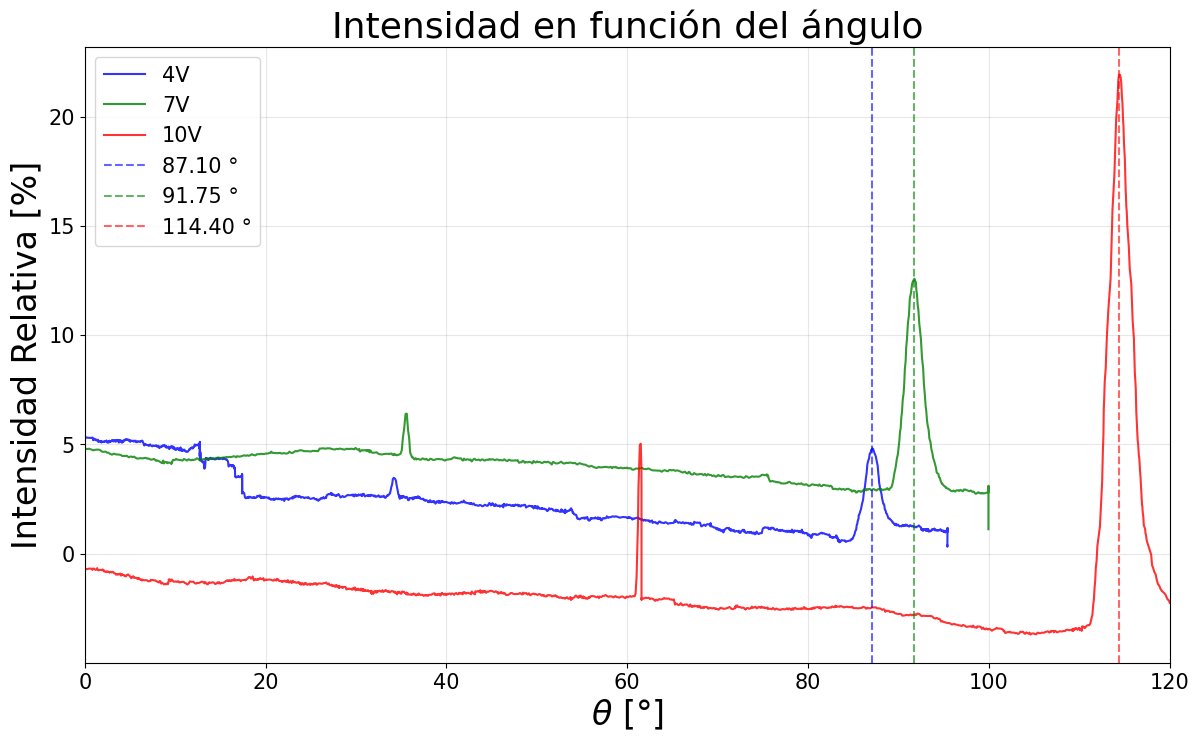

In [39]:
plt.figure(figsize=(14, 8))
plt.plot(angulo_4V, intensidad_relativa_4V, 'b-', label='4V', alpha=0.8, linewidth=1.5)
plt.plot(angulo_7V, intensidad_relativa_7V, 'g-', label='7V', alpha=0.8, linewidth=1.5)
plt.plot(angulo_10V, intensidad_relativa_10V, 'r-', label='10V', alpha=0.8, linewidth=1.5)
plt.axvline(angulo_inicial_4V, color='b', linestyle='--', alpha=0.6, label='87.10 °')
plt.axvline(angulo_inicial_7V, color='g', linestyle='--', alpha=0.6, label='91.75 °')
plt.axvline(angulo_inicial_10V, color='r', linestyle='--', alpha=0.6, label='114.40 °')
plt.xlabel(r'$\theta$ [°]', fontsize=24)
plt.ylabel('Intensidad Relativa [%]', fontsize=24)
plt.title("Intensidad en función del ángulo",
          fontsize=26)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)  # tamaño de los números en el eje x
plt.yticks(fontsize=15)
plt.xlim(0, 120)

Datos cargados correctamente

PASO 1: CALIBRACIÓN DE ÁNGULOS - θ_inicial
7V: θ_inicial = 91.75° (Intensidad máxima: 12.580)
10V: θ_inicial = 114.40° (Intensidad máxima: 21.920)

Ejemplo de ángulos corregidos (primeros 5 puntos):
4V:  [87.1 87.1 87.1 87.1 87.1]°
7V:  [91.75 91.75 91.75 91.75 91.75]°
10V: [114.4 114.4 114.4 114.4 114.4]°

PASO 2: CÁLCULO DEL ÍNDICE DE REFRACCIÓN - n
Ejemplo de índices de refracción (primeros 5 puntos):
4V:  [1.8663 1.8663 1.8663 1.8663 1.8663]
7V:  [1.8671 1.8671 1.8671 1.8671 1.8671]
10V: [1.7769 1.7769 1.7769 1.7769 1.7769]

PASO 3: CÁLCULO DE LA LONGITUD DE ONDA - λ
Ejemplo de longitudes de onda (primeros 5 puntos válidos):
4V:  [400.7 401.6 402.5 403.5 404.5] nm
7V:  [401.6 403.4 405.3 407.  409. ] nm
10V: [403.5 403.5 403.5 403.5 403.5] nm

EJEMPLOS DETALLADOS DE CÁLCULO

Ejemplo 1 - 4V:
  Ángulo medido: θ_medido = 0.00°
  Ángulo inicial: θ_inicial = 87.10°
  Ángulo corregido: θ_corregido = 87.10 - 0.00 = 87.10°
  Término interno: (2·sin(87.10°)/√3)

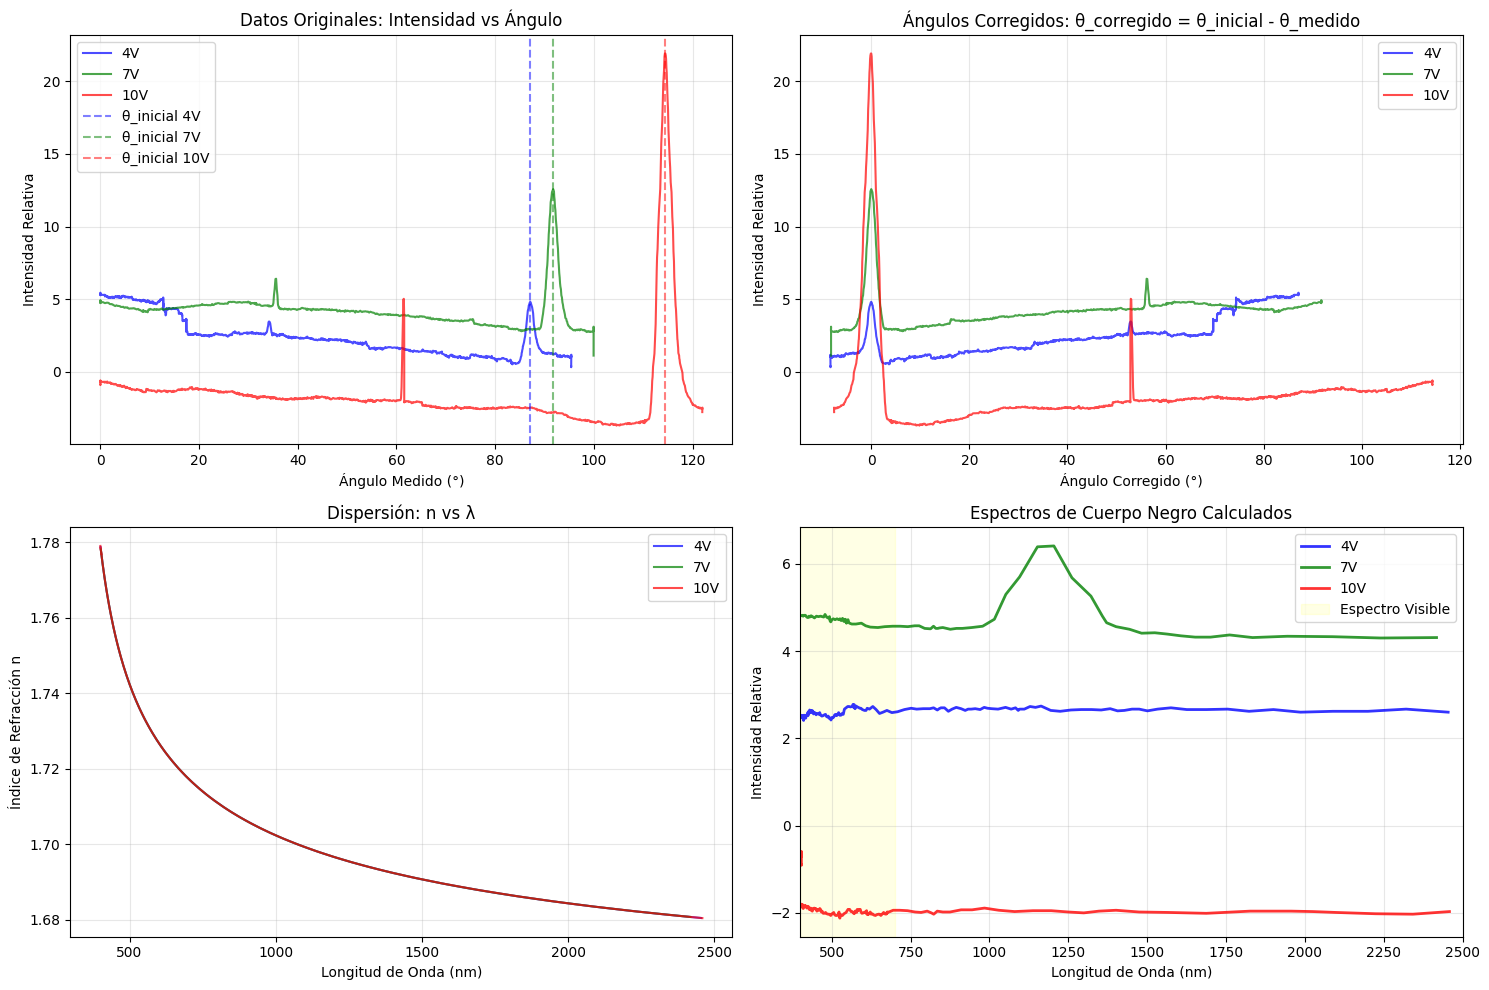


RESUMEN ESTADÍSTICO DE LOS ESPECTROS

4V:
  • Longitud de onda máxima: 567.6 nm
  • Rango de λ: 400.7 - 2454.5 nm
  • Puntos válidos: 164/2523
  • Intensidad máxima: 2.780

7V:
  • Longitud de onda máxima: 1204.2 nm
  • Rango de λ: 401.6 - 2417.7 nm
  • Puntos válidos: 103/806
  • Intensidad máxima: 6.410

10V:
  • Longitud de onda máxima: 403.4 nm
  • Rango de λ: 400.2 - 2458.6 nm
  • Puntos válidos: 197/1627
  • Intensidad máxima: -0.590

Resultados guardados en archivos CSV:
• resultados_calculo_lambda_4V.csv
• resultados_calculo_lambda_7V.csv
• resultados_calculo_lambda_10V.csv

¡Cálculo completado! Se han aplicado las ecuaciones:
• (23) θ_inicial = arg max(I(θ))
• (24) θ_corregido = θ_inicial - θ_medido
• (25) n = √[ ( (2·sin(θ_corregido)/√3) + 0.5 )² + 3/4 ]
• (A4) λ = 320 + 1/(n - 1.635) + 0.2/(n - 1.635)² + 0.19/(n - 1.635)³


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# =============================================================================
# 1. CARGAR DATOS (USANDO TUS ARCHIVOS)
# =============================================================================

# Cargar los archivos Excel
file_path = "Datos de Capstone.xlsx"  # 7V
file_path4 = "Datos de Capstone_4v.xlsx"
file_path10 = "Datos de Capstone_10v.xlsx"

df = pd.read_excel(file_path)
df4 = pd.read_excel(file_path4)
df10 = pd.read_excel(file_path10)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()
df4.columns = df4.columns.str.strip()
df10.columns = df10.columns.str.strip()

# Seleccionar columnas y filtrar datos
col1, col2 = df.columns[0], df.columns[1]
col11, col22 = df4.columns[0], df4.columns[1]
col111, col222 = df10.columns[0], df10.columns[1]

df_filtrado = df.dropna(subset=[col1, col2])
df4_filtrado = df4.dropna(subset=[col11, col22])
df10_filtrado = df10.dropna(subset=[col111, col222])

# Crear arrays
intensidad_7V = df_filtrado[col1].to_numpy()
angulo_7V = df_filtrado[col2].to_numpy()
intensidad_4V = df4_filtrado[col11].to_numpy()
angulo_4V = df4_filtrado[col22].to_numpy()
intensidad_10V = df10_filtrado[col111].to_numpy()
angulo_10V = df10_filtrado[col222].to_numpy()

print("Datos cargados correctamente")

# =============================================================================
# 2. PASO 1: CALIBRACIÓN DE ÁNGULOS - ECUACIÓN (23) y (24)
# =============================================================================

def encontrar_angulo_inicial(angulo, intensidad, voltaje_key):
    """
    Ecuación (23): θ_inicial = arg max(I(θ))
    Encuentra el ángulo donde la intensidad es máxima (pico central)
    """
    # Buscar el máximo global
    idx_max = np.argmax(intensidad)
    angulo_inicial = angulo[idx_max]
    
    print(f"{voltaje_key}: θ_inicial = {angulo_inicial:.2f}° (Intensidad máxima: {intensidad[idx_max]:.3f})")
    return angulo_inicial, idx_max

print("\n" + "="*50)
print("PASO 1: CALIBRACIÓN DE ÁNGULOS - θ_inicial")
print("="*50)

# Encontrar ángulos iniciales para cada voltaje
#theta_inicial_4V, idx_pico_4V = encontrar_angulo_inicial(angulo_4V, intensidad_4V, "4V")
theta_inicial_4V=87.10;idx_pico_4V=4.22
theta_inicial_7V, idx_pico_7V = encontrar_angulo_inicial(angulo_7V, intensidad_7V, "7V")
theta_inicial_10V, idx_pico_10V = encontrar_angulo_inicial(angulo_10V, intensidad_10V, "10V")

def calcular_angulo_corregido(angulo_medido, angulo_inicial):
    """
    Ecuación (24): θ_corregido = θ_inicial - θ_medido
    Ángulo corregido representa la desviación de la luz
    """
    theta_corregido = angulo_inicial - angulo_medido
    return theta_corregido

# Calcular ángulos corregidos para todos los puntos
theta_corregido_4V = calcular_angulo_corregido(angulo_4V, theta_inicial_4V)
theta_corregido_7V = calcular_angulo_corregido(angulo_7V, theta_inicial_7V)
theta_corregido_10V = calcular_angulo_corregido(angulo_10V, theta_inicial_10V)

print(f"\nEjemplo de ángulos corregidos (primeros 5 puntos):")
print(f"4V:  {theta_corregido_4V[:5].round(2)}°")
print(f"7V:  {theta_corregido_7V[:5].round(2)}°")
print(f"10V: {theta_corregido_10V[:5].round(2)}°")

# =============================================================================
# 3. PASO 2: CÁLCULO DEL ÍNDICE DE REFRACCIÓN - ECUACIÓN (25)
# =============================================================================

def calcular_indice_refraccion(theta_corregido):
    """
    Ecuación (25): 
    n = √[ ( (2·sin(θ_corregido)/√3) + 0.5 )² + 3/4 ]
    
    Donde θ_corregido está en grados
    """
    # Convertir a radianes para funciones trigonométricas
    theta_rad = np.radians(theta_corregido)
    
    # Calcular término interno
    termino_interno = (2 * np.sin(theta_rad) / np.sqrt(3)) + 0.5
    
    # Calcular índice de refracción
    n = np.sqrt(termino_interno**2 + 3/4)
    
    return n

print("\n" + "="*50)
print("PASO 2: CÁLCULO DEL ÍNDICE DE REFRACCIÓN - n")
print("="*50)

# Calcular índices de refracción
n_4V = calcular_indice_refraccion(theta_corregido_4V)
n_7V = calcular_indice_refraccion(theta_corregido_7V)
n_10V = calcular_indice_refraccion(theta_corregido_10V)

print(f"Ejemplo de índices de refracción (primeros 5 puntos):")
print(f"4V:  {n_4V[:5].round(4)}")
print(f"7V:  {n_7V[:5].round(4)}")
print(f"10V: {n_10V[:5].round(4)}")

# =============================================================================
# 4. CÁLCULO DE LA LONGITUD DE ONDA - ECUACIÓN A4
# =============================================================================

def calcular_longitud_onda(n):
    """
    Calcular longitud de onda a partir del índice de refracción
    usando la ecuación empírica del prisma:
    
    λ = 320 + 1/(n - 1.635) + 0.2/(n - 1.635)² + 0.19/(n - 1.635)³
    """
    # Calcular denominador
    denominador = n - 1.635
    
    # Evitar división por cero
    denominador = np.where(np.abs(denominador) < 1e-10, 1e-10, denominador)
    
    # Calcular longitud de onda (en nanómetros)
    lambda_calculada = 320 + 1/denominador + 0.2/denominador**2 + 0.19/denominador**3
    
    # Filtrar valores físicamente razonables (400-2500 nm)
    lambda_filtrada = np.where((lambda_calculada >= 400) & (lambda_calculada <= 2500), 
                              lambda_calculada, np.nan)
    
    return lambda_filtrada

print("\n" + "="*50)
print("PASO 3: CÁLCULO DE LA LONGITUD DE ONDA - λ")
print("="*50)

# Calcular longitudes de onda
lambda_4V = calcular_longitud_onda(n_4V)
lambda_7V = calcular_longitud_onda(n_7V)
lambda_10V = calcular_longitud_onda(n_10V)

print(f"Ejemplo de longitudes de onda (primeros 5 puntos válidos):")
# Encontrar primeros valores válidos (no NaN)
validos_4V = lambda_4V[~np.isnan(lambda_4V)][:5]
validos_7V = lambda_7V[~np.isnan(lambda_7V)][:5]
validos_10V = lambda_10V[~np.isnan(lambda_10V)][:5]

print(f"4V:  {validos_4V.round(1)} nm")
print(f"7V:  {validos_7V.round(1)} nm")
print(f"10V: {validos_10V.round(1)} nm")

# =============================================================================
# 5. EJEMPLO DETALLADO PARA UN ÁNGULO ESPECÍFICO
# =============================================================================

def ejemplo_detallado_calculo(angulo_medido, angulo_inicial, nombre="Ejemplo"):
    """
    Muestra el cálculo paso a paso para un ángulo específico
    """
    print(f"\n{nombre}:")
    print(f"  Ángulo medido: θ_medido = {angulo_medido:.2f}°")
    print(f"  Ángulo inicial: θ_inicial = {angulo_inicial:.2f}°")
    
    # Paso 1: Ángulo corregido
    theta_corr = calcular_angulo_corregido(angulo_medido, angulo_inicial)
    print(f"  Ángulo corregido: θ_corregido = {angulo_inicial:.2f} - {angulo_medido:.2f} = {theta_corr:.2f}°")
    
    # Paso 2: Índice de refracción
    n = calcular_indice_refraccion(theta_corr)
    theta_rad = np.radians(theta_corr)
    termino = (2 * np.sin(theta_rad) / np.sqrt(3)) + 0.5
    print(f"  Término interno: (2·sin({theta_corr:.2f}°)/√3) + 0.5 = {termino:.4f}")
    print(f"  Índice de refracción: n = √({termino:.4f}² + 0.75) = {n:.4f}")
    
    # Paso 3: Longitud de onda
    lambda_calc = calcular_longitud_onda(n)
    denominador = n - 1.635
    print(f"  Denominador: n - 1.635 = {denominador:.4f}")
    print(f"  Longitud de onda: λ = 320 + 1/{denominador:.4f} + 0.2/{denominador:.4f}² + 0.19/{denominador:.4f}³")
    print(f"  Resultado: λ = {lambda_calc:.1f} nm")
    
    return lambda_calc

print("\n" + "="*50)
print("EJEMPLOS DETALLADOS DE CÁLCULO")
print("="*50)

# Ejemplos para diferentes ángulos
ejemplo1 = ejemplo_detallado_calculo(angulo_4V[10], theta_inicial_4V, "Ejemplo 1 - 4V")
ejemplo2 = ejemplo_detallado_calculo(angulo_7V[15], theta_inicial_7V, "Ejemplo 2 - 7V")
ejemplo3 = ejemplo_detallado_calculo(angulo_10V[20], theta_inicial_10V, "Ejemplo 3 - 10V")

# =============================================================================
# 6. GRÁFICOS DE RESULTADOS
# =============================================================================

plt.figure(figsize=(15, 10))

# Gráfico 1: Intensidad vs Ángulo (datos originales)
plt.subplot(2, 2, 1)
plt.plot(angulo_4V, intensidad_4V, 'b-', label='4V', alpha=0.7)
plt.plot(angulo_7V, intensidad_7V, 'g-', label='7V', alpha=0.7)
plt.plot(angulo_10V, intensidad_10V, 'r-', label='10V', alpha=0.7)

# Marcar picos centrales
plt.axvline(theta_inicial_4V, color='b', linestyle='--', alpha=0.5, label='θ_inicial 4V')
plt.axvline(theta_inicial_7V, color='g', linestyle='--', alpha=0.5, label='θ_inicial 7V')
plt.axvline(theta_inicial_10V, color='r', linestyle='--', alpha=0.5, label='θ_inicial 10V')

plt.xlabel('Ángulo Medido (°)')
plt.ylabel('Intensidad Relativa')
plt.title('Datos Originales: Intensidad vs Ángulo')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Ángulos corregidos
plt.subplot(2, 2, 2)
plt.plot(theta_corregido_4V, intensidad_4V, 'b-', label='4V', alpha=0.7)
plt.plot(theta_corregido_7V, intensidad_7V, 'g-', label='7V', alpha=0.7)
plt.plot(theta_corregido_10V, intensidad_10V, 'r-', label='10V', alpha=0.7)
plt.xlabel('Ángulo Corregido (°)')
plt.ylabel('Intensidad Relativa')
plt.title('Ángulos Corregidos: θ_corregido = θ_inicial - θ_medido')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Índice de refracción vs Longitud de onda
plt.subplot(2, 2, 3)
plt.plot(lambda_4V, n_4V, 'b-', label='4V', alpha=0.7)
plt.plot(lambda_7V, n_7V, 'g-', label='7V', alpha=0.7)
plt.plot(lambda_10V, n_10V, 'r-', label='10V', alpha=0.7)
plt.xlabel('Longitud de Onda (nm)')
plt.ylabel('Índice de Refracción n')
plt.title('Dispersión: n vs λ')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 4: Espectro final (Intensidad vs Longitud de onda)
plt.subplot(2, 2, 4)
plt.plot(lambda_4V, intensidad_4V, 'b-', label='4V', alpha=0.8, linewidth=2)
plt.plot(lambda_7V, intensidad_7V, 'g-', label='7V', alpha=0.8, linewidth=2)
plt.plot(lambda_10V, intensidad_10V, 'r-', label='10V', alpha=0.8, linewidth=2)

# Región visible
plt.axvspan(400, 700, alpha=0.1, color='yellow', label='Espectro Visible')

plt.xlabel('Longitud de Onda (nm)')
plt.ylabel('Intensidad Relativa')
plt.title('Espectros de Cuerpo Negro Calculados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(400, 2500)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. RESUMEN ESTADÍSTICO
# =============================================================================

def resumen_estadistico(lambda_array, intensidad_array, voltaje_key):
    """Calcula estadísticas del espectro"""
    # Filtrar valores válidos
    mask_valido = ~np.isnan(lambda_array)
    lambda_valido = lambda_array[mask_valido]
    intensidad_valida = intensidad_array[mask_valido]
    
    if len(lambda_valido) == 0:
        print(f"{voltaje_key}: No hay datos válidos")
        return
    
    # Encontrar longitud de onda de máxima intensidad
    idx_max = np.argmax(intensidad_valida)
    lambda_max = lambda_valido[idx_max]
    
    # Estadísticas
    print(f"\n{voltaje_key}:")
    print(f"  • Longitud de onda máxima: {lambda_max:.1f} nm")
    print(f"  • Rango de λ: {lambda_valido.min():.1f} - {lambda_valido.max():.1f} nm")
    print(f"  • Puntos válidos: {len(lambda_valido)}/{len(lambda_array)}")
    print(f"  • Intensidad máxima: {intensidad_valida.max():.3f}")
    
    return lambda_max

print("\n" + "="*50)
print("RESUMEN ESTADÍSTICO DE LOS ESPECTROS")
print("="*50)

lambda_max_4V = resumen_estadistico(lambda_4V, intensidad_4V, "4V")
lambda_max_7V = resumen_estadistico(lambda_7V, intensidad_7V, "7V")
lambda_max_10V = resumen_estadistico(lambda_10V, intensidad_10V, "10V")

# =============================================================================
# 8. EXPORTAR RESULTADOS
# =============================================================================

# Crear DataFrames con todos los resultados
resultados_4V = pd.DataFrame({
    'Angulo_Medido_grados': angulo_4V,
    'Intensidad_Relativa': intensidad_4V,
    'Angulo_Corregido_grados': theta_corregido_4V,
    'Indice_Refraccion': n_4V,
    'Longitud_Onda_nm': lambda_4V
})

resultados_7V = pd.DataFrame({
    'Angulo_Medido_grados': angulo_7V,
    'Intensidad_Relativa': intensidad_7V,
    'Angulo_Corregido_grados': theta_corregido_7V,
    'Indice_Refraccion': n_7V,
    'Longitud_Onda_nm': lambda_7V
})

resultados_10V = pd.DataFrame({
    'Angulo_Medido_grados': angulo_10V,
    'Intensidad_Relativa': intensidad_10V,
    'Angulo_Corregido_grados': theta_corregido_10V,
    'Indice_Refraccion': n_10V,
    'Longitud_Onda_nm': lambda_10V
})

# Guardar resultados
resultados_4V.to_csv('resultados_calculo_lambda_4V.csv', index=False)
resultados_7V.to_csv('resultados_calculo_lambda_7V.csv', index=False)
resultados_10V.to_csv('resultados_calculo_lambda_10V.csv', index=False)

print(f"\nResultados guardados en archivos CSV:")
print(f"• resultados_calculo_lambda_4V.csv")
print(f"• resultados_calculo_lambda_7V.csv") 
print(f"• resultados_calculo_lambda_10V.csv")

print("\n¡Cálculo completado! Se han aplicado las ecuaciones:")
print("• (23) θ_inicial = arg max(I(θ))")
print("• (24) θ_corregido = θ_inicial - θ_medido")
print("• (25) n = √[ ( (2·sin(θ_corregido)/√3) + 0.5 )² + 3/4 ]")
print("• (A4) λ = 320 + 1/(n - 1.635) + 0.2/(n - 1.635)² + 0.19/(n - 1.635)³")

In [41]:
theta04V=87.10
theta07V=91.75
theta010V=114.40
t4final = abs(87.10 - angulo_4V)
t7final = abs(91.75 - angulo_7V)
t10final = abs(114.40 - angulo_10V)
def calcular_indice_refraccion(theta_corregido):
    """
    Ecuación (25): 
    n = √[ ( (2·sin(θ_corregido)/√3) + 0.5 )² + 3/4 ]
    
    Donde θ_corregido está en grados
    """
    # Convertir a radianes para funciones trigonométricas
    theta_rad = np.radians(theta_corregido)
    
    # Calcular término interno
    termino_interno = (2 * np.sin(theta_rad) / np.sqrt(3)) + 0.5
    
    # Calcular índice de refracción
    n = np.sqrt(termino_interno**2 + 3/4)
    
    return n

print("\n" + "="*50)
print("PASO 2: CÁLCULO DEL ÍNDICE DE REFRACCIÓN - n")
print("="*50)

# Calcular índices de refracción
n_4V = calcular_indice_refraccion(t4final)
n_7V = calcular_indice_refraccion(t7final)
n_10V = calcular_indice_refraccion(t10final)

print(f"Ejemplo de índices de refracción (primeros 5 puntos):")
print(f"4V:  {n_4V[:5].round(4)}")
print(f"7V:  {n_7V[:5].round(4)}")
print(f"10V: {n_10V[:5].round(4)}")


PASO 2: CÁLCULO DEL ÍNDICE DE REFRACCIÓN - n
Ejemplo de índices de refracción (primeros 5 puntos):
4V:  [1.8663 1.8663 1.8663 1.8663 1.8663]
7V:  [1.8672 1.8672 1.8672 1.8672 1.8672]
10V: [1.7769 1.7769 1.7769 1.7769 1.7769]


In [56]:
# =============================================================================
# 4. CÁLCULO DE LA LONGITUD DE ONDA - ECUACIÓN A4
# =============================================================================

def calcular_longitud_onda(n):
    """
    Calcular longitud de onda a partir del índice de refracción
    usando la ecuación empírica del prisma:
    
    λ = 320 + 1/(n - 1.635) + 0.2/(n - 1.635)² + 0.19/(n - 1.635)³
    """
    # Calcular denominador
    denominador = n - 1.635
    
    # Evitar división por cero
    denominador = np.where(np.abs(denominador) < 1e-10, 1e-10, denominador)
    
    # Calcular longitud de onda (en nanómetros)
    lambda_calculada = 320 + 1/denominador + 0.2/denominador**2 + 0.19/denominador**3
    
    # Filtrar valores físicamente razonables (400-2500 nm)
    lambda_filtrada = np.where((lambda_calculada >= 400) & (lambda_calculada <= 2500), 
                              lambda_calculada, np.nan)
    
    return lambda_filtrada

print("\n" + "="*50)
print("PASO 3: CÁLCULO DE LA LONGITUD DE ONDA - λ")
print("="*50)

# Calcular longitudes de onda
lambda_4V = calcular_longitud_onda(n_4V)
lambda_7V = calcular_longitud_onda(n_7V)
lambda_10V = calcular_longitud_onda(n_10V)

print(f"Ejemplo de longitudes de onda (primeros 5 puntos válidos):")
# Encontrar primeros valores válidos (no NaN)
validos_4V = lambda_4V[~np.isnan(lambda_4V)][:5]
validos_7V = lambda_7V[~np.isnan(lambda_7V)][:5]
validos_10V = lambda_10V[~np.isnan(lambda_10V)][:5]

print(f"4V:  {validos_4V.round(1)} nm")
print(f"7V:  {validos_7V.round(1)} nm")
print(f"10V: {validos_10V.round(1)} nm")
print(np.mean(validos_4V))
print(np.mean(validos_7V))
print(np.mean(validos_10V))


PASO 3: CÁLCULO DE LA LONGITUD DE ONDA - λ
Ejemplo de longitudes de onda (primeros 5 puntos válidos):
4V:  [400.7 401.6 402.5 403.5 404.5] nm
7V:  [401.6 403.5 405.3 407.  409. ] nm
10V: [403.5 403.5 403.5 403.5 403.5] nm
402.5444295681724
405.2734446759039
403.4836974251954


(390.0, 2500.0)

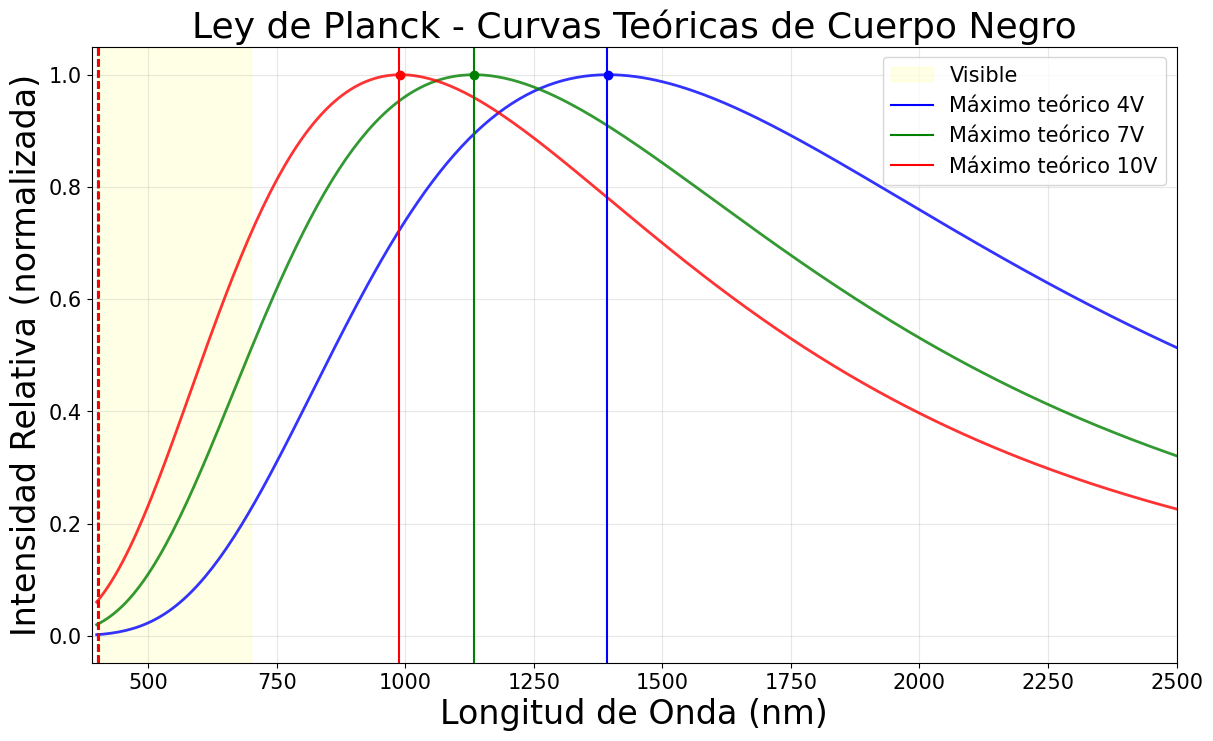

In [64]:
# Gráfico 4: Distribución espectral teórica (Ley de Planck)
def ley_planck(lambda_nm, T):
    """Ley de Planck para la radiación de cuerpo negro"""
    lambda_m = lambda_nm * 1e-9  # Convertir a metros
    term1 = 2 * np.pi * h * c**2
    term2 = lambda_m**5
    term3 = np.exp((h * c) / (lambda_m * k * T)) - 1
    return term1 / (term2 * term3)
plt.figure(figsize=(14, 8))
# Generar curvas teóricas
lambda_range = np.linspace(400, 2500, 300)
for T, color, label in zip(temps, ['b', 'g', 'r'], ['4V', '7V', '10V']):
    planck_curve = ley_planck(lambda_range, T)
    # Normalizar para comparación
    planck_curve = planck_curve / np.max(planck_curve)
    plt.plot(lambda_range, planck_curve, color+'-', 
                    alpha=0.8, linewidth=2)
    
    # Marcar λ_max teórica en las curvas de Planck
    lambda_max_teo = ley_wien(T)
    idx_teo = np.argmin(np.abs(lambda_range - lambda_max_teo))
    plt.plot(lambda_max_teo, planck_curve[idx_teo], color+'o', markersize=6)

plt.axvspan(400, 700, alpha=0.1, color='yellow', label='Visible')
plt.xlabel('Longitud de Onda (nm)', fontsize=24)
plt.ylabel('Intensidad Relativa (normalizada)', fontsize=24)
plt.title('Ley de Planck - Curvas Teóricas de Cuerpo Negro', fontsize=26)
plt.grid(True, alpha=0.3)
plt.axvline(1393,color="blue",label="Máximo teórico 4V")

plt.axvline(1133.2749,color="green",label="Máximo teórico 7V")
plt.axvline(987.3590,color="red",label="Máximo teórico 10V")
plt.axvline(402.544,color="blue",linestyle='--')
plt.axvline(405.27,color="green",linestyle='--')
plt.axvline(403.48,color="red",linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)  # tamaño de los números en el eje x
plt.yticks(fontsize=15)
plt.xlim(390, 2500)


(375.0, 2500.0)

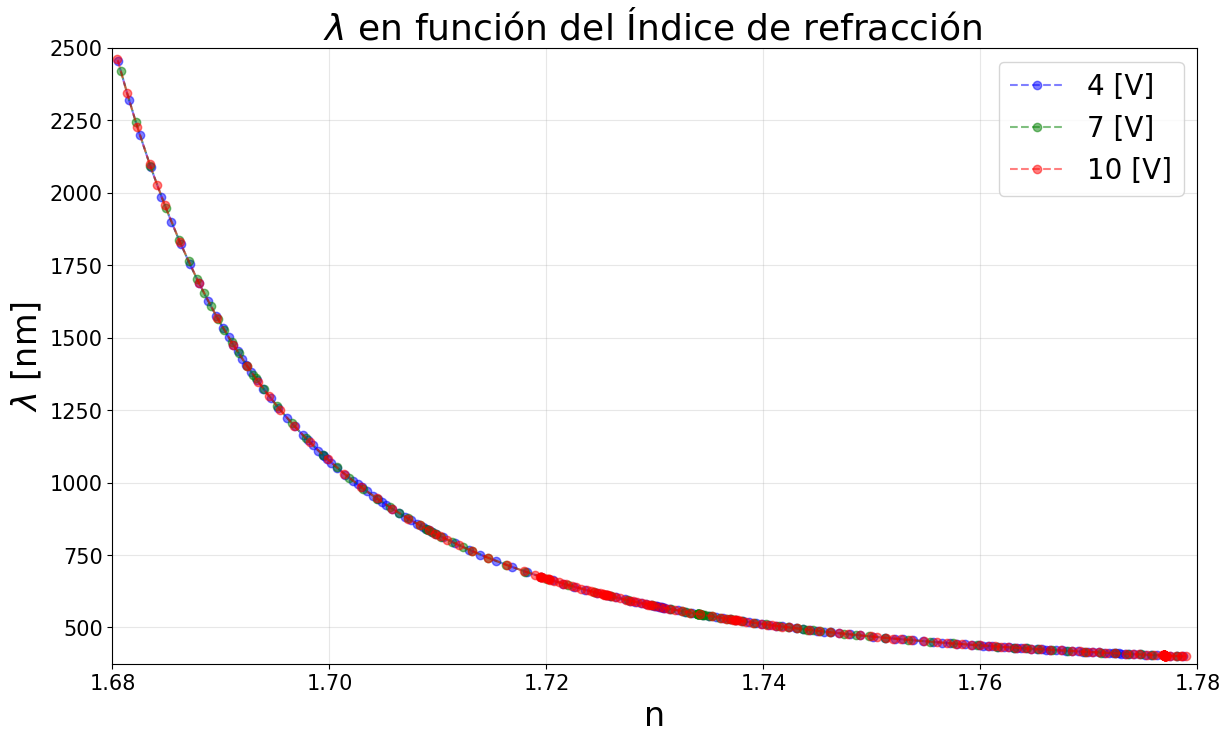

In [101]:
plt.figure(figsize=(14, 8))
plt.xlabel(r'n', fontsize=24)
plt.ylabel(r'$\lambda$ [nm]' , fontsize=24)
plt.title(r'$\lambda$ en función del Índice de refracción ', fontsize=26)

plt.xticks(fontsize=15)  # tamaño de los números en el eje x
plt.yticks(fontsize=15)
plt.plot(n_4V,lambda_4V,"--o",markersize=6,alpha=0.5,color="blue",label="4 [V]")
plt.plot(n_7V,lambda_7V,"--o",markersize=6,alpha=0.5,color="green",label="7 [V]")
plt.plot(n_10V,lambda_10V,"--o",markersize=6,alpha=0.5,color="red",label="10 [V]")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=20)
plt.xlim(1.68,1.78)
plt.ylim(375,2500)